# Malhas numéricas

Ao transferir a informação de nossos modelos matemáticos do universo _contínuo_ para o universo _discreto_ do computador, precisamos criar uma _malha numérica_ (a construção Cartesiana em gradeado recebe o nome de _grade numérica_), que pode ser estruturada por uma sucessão de pontos tal como uma imitação de uma reta "furada". Em uma dimensão, uma malha numérica _uniforme_, cujo espaçamento entre seus pontos é igual, pode ser definida como uma progressão aritmética: 

$$t_n = t_0 \pm n h, \ \ n = 1,2,\ldots,N,$$

onde $h$ é conhecido como _passo_.

## Malhas uniformes

A figura abaixo mostra os pontos de uma malha numérica uniforme. A linha pontilhada foi desenhada meramente para representar a porção do contínuo que o computador **não** captura, isto é, a informação que é perdida.

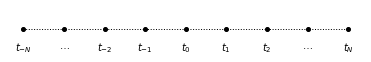

In [1]:
# desenha uma malha numerica uniforme

import numpy as np
import matplotlib.pyplot as plt 

# pontos
x = np.arange(9)
y = 0*x

# configuracoes
plt.figure(figsize=(6.4,0.5))
plt.plot(x,y,'ok',markersize=4)
plt.plot(x,y,':k',linewidth=1)
plt.ylim((-0.02,0.1))
plt.box(False)
locs, labels = plt.xticks()
plt.xticks(x, ('$t_{-N}$','$\ldots$','$t_{-2}$','$t_{-1}$','$t_{0}$','$t_{1}$','$t_{2}$','$\ldots$','$t_{N}$') )
plt.tick_params(axis='both',width=0.0,labelleft=False)

## Malhas não uniformes

Uma malha numérica _não uniforme_ é aquela para a qual o tamanho do passo não é constante, como
vemos na Figura a seguir. Neste caso, podemos ter comprimentos arbitrários $h_0 \neq h_1 \neq \ldots \neq h_{N-1}$ todos distintos, tanto à esquerda quanto à direita de $t_0$. 

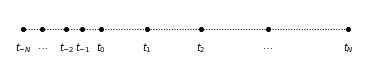

In [2]:
# desenha uma malha numerica nao-uniforme

# pontos
x = np.array([-0.01,0.06,0.15,0.21,0.28,0.45,0.65,0.9,1.2])
y = 0*x

# configuracoes
plt.figure(figsize=(6.4,0.5))
plt.plot(x,y,'ok',markersize=4)
plt.plot(x,y,':k',linewidth=1)
plt.ylim((-0.02,0.1))
plt.box(False)
locs, labels = plt.xticks()
plt.xticks(x, ('$t_{-N}$','$\ldots$','$t_{-2}$','$t_{-1}$','$t_{0}$','$t_{1}$','$t_{2}$','$\ldots$','$t_{N}$') )
plt.tick_params(axis='both',width=0.0,labelleft=False)

## Refinamento de malha 

Quando uma malha não uniforme possui uma ou mais regiões onde há uma acumulação de pontos, dizemos que ela está _refinada_ nessas regiões. Na figura, os pontos $t_{-2}, t_{-1}$ e $t_{0}$, por exemplo, acumulam-se próximos um do outro, ao passo que os pontos $t_1, t_2$ e $t_N$ afastam-se cada vez mais um do outro e da região de refinamento. Então, poderíamos dizer que a malha foi refinada entre $t_{-2}$ e $t_0$. 

O refinamento faz mais sentido apenas quando queremos capturar informações localizadas com mais precisão. Esta situação ocorre, por exemplo, em problemas práticos que envolvem variações ou mudanças abruptas de propriedades, como é o caso da massa específica nas proximidades de uma interface de dois fluidos imiscíveis.

Nos esquemas acima, os nós com índice negativo são apenas ilustrativos e têm pouco efeito prático. Podemos trabalhar apenas com a indexação positiva sem problema algum.

## Malha numérica bidimensional uniforme

Em particular, uma _malha numérica_ bidimensional dependerá de cópias de _arrays_ unidimensionais que formam as coordenadas do plano Cartesiano em cada dimensão

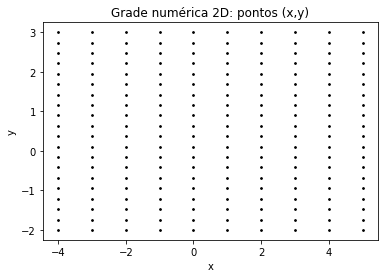

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# limites do domínio:
# região do plano [a,b] x [c,d]
a, b = -4.0, 5.0
c, d = -2.0, 3.0

# no. de pontos em cada direção
nx, ny = 10, 20 

# distribuição dos pontos
x = np.linspace(a,b,nx)
y = np.linspace(c,d,ny)

# grade numérica 2D
[X,Y] = np.meshgrid(x,y)

# plotando pontos da grade numérica
plt.scatter(X,Y,s=3,c='k');
plt.title('Grade numérica 2D: pontos (x,y)')
plt.xlabel('x'); plt.ylabel('y');

### Plotando curvas de nível

Plotaremos as curvas de nível 0 de funções não-lineares é útil para realizarmos análise gráfica e escolher vetores de estimativa inicial.

Para plotar curvas de nível das funções sobre a grade numérica anterior, fazemos o seguinte:

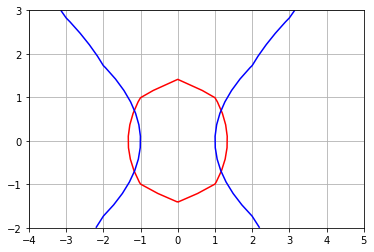

In [4]:
# funções definidas sobre a grade 2D
F = X**2 + Y**2 - 2
G = X**2 - Y**2 - 1

# contorno de nível 0
plt.contour(X,Y,F,colors='red',levels=0);
plt.contour(X,Y,G,colors='blue',levels=0);
plt.grid()

Por que a figura está meio "tosca"? Porque temos poucos pontos na grade. Vamos aumentar o número de pontos. Este processo é conhecido como _refinamento de malha_.

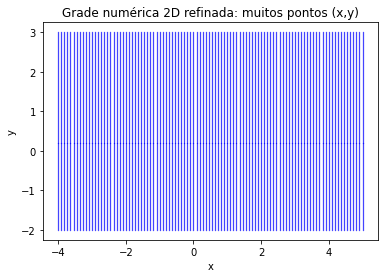

In [5]:
# refinando a malha numérica
nx2, ny2 = 100, 200

# redistribuição dos pontos
x2 = np.linspace(a,b,nx2)
y2 = np.linspace(c,d,ny2)

# grade numérica 2D refinada
[X2,Y2] = np.meshgrid(x2,y2)

# plotando pontos da grade numérica
plt.scatter(X2,Y2,s=0.1,c='b');
plt.title('Grade numérica 2D refinada: muitos pontos (x,y)')
plt.xlabel('x'); plt.ylabel('y');

Vamos plotar novamente as curvas de nível das funções sobre a grade numérica refinada.

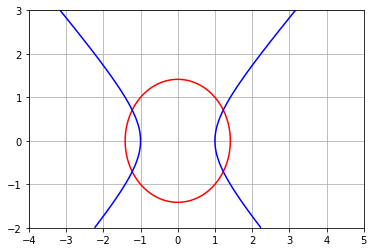

In [75]:
# funções definidas sobre a grade 2D refinada
F2 = X2**2 + Y2**2 - 2
G2 = X2**2 - Y2**2 - 1

# contorno de nível 0 na malha refinada
plt.contour(X2,Y2,F2,colors='red',levels=0);
plt.contour(X2,Y2,G2,colors='blue',levels=0);
plt.grid()